In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import os
import seaborn as sns
from IPython.display import display
import numpy as np
import re
import json


pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정}
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')


In [2]:
# 데이터 불러오기
regular_season = pd.read_csv('../datas/Regular_Season_Batter.csv')

'''
데이터는 위에 결측값을 채워둔 프레임을 가져와서 사용하려고 한다.
'''

display(regular_season.describe())
print(regular_season.shape)
print(regular_season.isna().sum())

'''
2454개의 행과 30개의 열을 가지고 있고,
선수 수는 2454명, 데이터는 1993년 부터 2018년까지 있다.
앞서 살펴본 프리시즌에 비해 데이터 양이 더 많은 것을 알 수 있다.
''';


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,178.079462,2011.614507,0.235042,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.340183,0.303684,3.676447,0.643868
std,97.557947,4.992833,0.100894,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.166238,0.115253,4.585248,0.268184
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.200000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.263158,0.269000,0.000000,0.541000
50%,183.000000,2013.000000,0.253000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.358000,0.328000,2.000000,0.686000
75%,265.000000,2016.000000,0.290000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.434946,0.367000,5.000000,0.797000
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


(2454, 32)
batter_id             0
batter_name           0
year                  0
team                  0
avg                   0
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight         0
year_born             0
position              0
career                0
starting_salary    1067
OPS                   0
pos                   0
hand                  0
country               0
dtype: int64


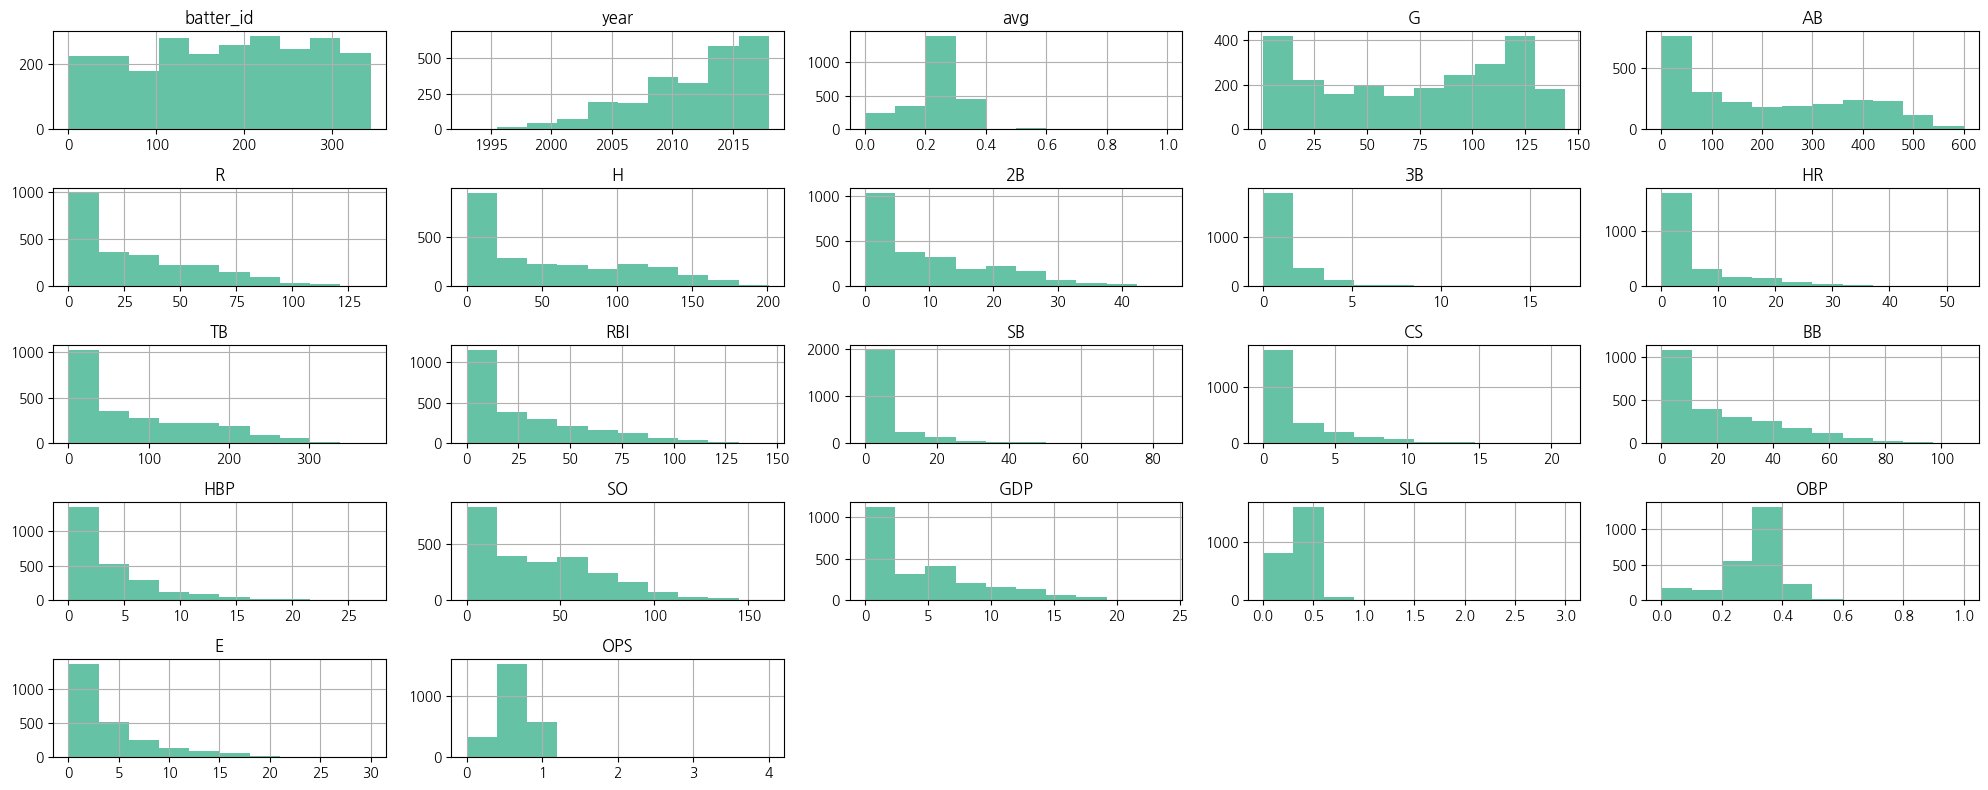

In [3]:
regular_season.hist(figsize=(20,8))
plt.tight_layout()
plt.show()

'''
이 데이터를 살펴 보았는데, 여전히 0쪽에 가까운 부분들이 있다.
R(득점), 안타(H), 홈런(HR) 등 타자 쪽 기록이 왼쪽에 가깝다.

하지만 반대로 투수 쪽 기록인 삼진(SO)이 꽤나 높은 것으로 보인다.
안타는 적은데 삼진이나 병살이 좀 높다, 그리고 볼넷도 좀 낮은 것으로 보아
투고타저가 좀 있다고 생각한다.

하지만 원래 투고타저를 확인해 보려면 투수의 성적을 보아야 하지만 없으므로 정확하지는 않다.
또한 정확히 나눌 수 있는 지표가 따로 없기 때문에 개인의 의견에 따라 갈리는 듯 하다.
''';


/tmp/ipykernel_14329/1915733312.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(), rotation=90) # x라벨 90회전


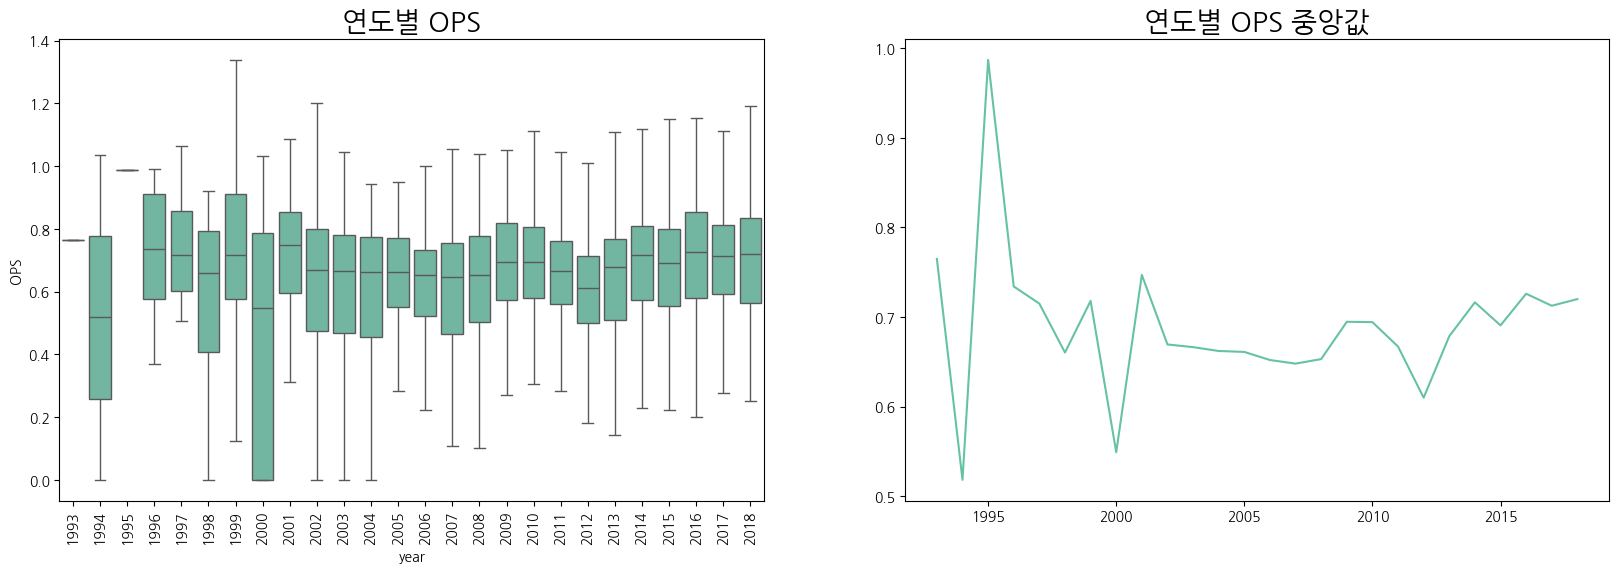

In [4]:
# OPS 박스 플롯 그리기

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)  # 1행 2열에서 1번째 그래프
f = sns.boxplot(x='year', y='OPS', data = regular_season, showfliers=False)
f.set_title('연도별 OPS', size=20)
f.set_xticklabels(f.get_xticklabels(), rotation=90) # x라벨 90회전
plt.subplot(1,2,2)
plt.plot(regular_season.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size=20)
plt.show()

'''
박스 플롯은 대부분 비슷한 그림이다.
하지만 연도별 중앙값에서는 93년 초방부터 00년까지 데이터에서 큰 변동폭을 보인다.

93년부터 00년까지의 데이터를 추출해 확인해 보려고 한다.
''';


In [6]:
'''
이제 팀별 OPS를 비교해 보려고 한다.
'''

display(regular_season.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median'))


'''
몇 가지 문제가 있는데
1. 팀 명이 바뀌는 경우에는 하나로 되어있지 않고 따로 되어있다. 
    (현대 - 우리 - 히어로즈 - 넥센, OB - 두산과 같이 팀이 인수되어 변경되었지만 여기서는 반영되지 않고 다른 팀으로 분류되었다.)
2. 그러자니 창단부터 이어진 팀(삼성, 롯데)도 98년 이전에는 데이터가 없다.
3. 전신팀이 없는 경우도 있다.
    (한화 전신 빙그레, LG 전신 MBC)
    
그렇기 때문에 전신까지 모두 합쳐서 새로운 데이터프레임을 만들어볼 생각이다.
''';


year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,0.681098,0.710473,0.583333,0.717176,0.546944,0.644474,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.774500,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.609035,0.698978,0.645345,0.674368,0.594543,0.657000,0.588000,0.661500,0.622015,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652500,0.636742,0.703500,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.000000,0.636000,0.494000,0.601000,0.682591,0.723500,0.693000,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,0.643209,0.672643,0.699575,0.639750,0.654608,0.679000,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,0.638655,0.662041,0.673000,0.586748,0.615000,0.725455,0.675000,0.653000,0.676715,0.581845,0.564000,0.689000,0.622000,0.704000,0.728000,0.7100


In [7]:
'''
전신 팀의 경우, 팀 이름은 현재 팀으로 간주한다.
ex) 해태, 기아 -> 기아
'''
team_list = set(regular_season['team']) # 팀 목록

new_team_dict = {
    '해태': 'KIA',
    'OB': '두산',
    '현대': '넥센',
    '우리': '넥센',
    '히어로즈': '넥센',
}

regular_season['team'] = regular_season['team'].map(new_team_dict).fillna(regular_season['team'])

# 피벗 테이블 만들기
regular_season_pivot = regular_season.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')
display(regular_season_pivot)


year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,0.764912,1.036198,0.987261,0.781758,0.836358,0.844605,0.492506,0.463483,0.849337,0.829906,0.681098,0.710473,0.583333,0.717176,0.546944,0.644474,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.774500,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.609035,0.698978,0.645345,0.674368,0.594543,0.657000,0.588000,0.661500,0.622015,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652500,0.636742,0.703500,0.703000,0.705000,0.6000
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.000000,0.636000,0.494000,0.601000,0.682591,0.723500,0.693000,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,0.833385,0.783934,0.547971,0.794743,0.838528,0.828384,0.673733,0.819444,0.716000,0.721571,0.677000,0.613006,0.645375,0.598059,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,0.615797,0.727667,0.853830,0.739755,0.695808,0.762809,0.643209,0.672643,0.699575,0.639750,0.654608,0.679000,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,0.638655,0.662041,0.673000,0.586748,0.615000,0.725455,0.675000,0.653000,0.676715,0.581845,0.564000,0.689000,0.622000,0.704000,0.728000,0.7100
삼성,NaN,NaN,NaN,NaN,NaN,NaN,0.575549,0.369048,0.830124,0.742000,0.428000,0.579137,0.741419,0.717275,0.597875,0.669774,0.684000,0.771000,0.677606,0.614071,0.712500,0.737000,0.724000,0.717500,0.684000,0.6515


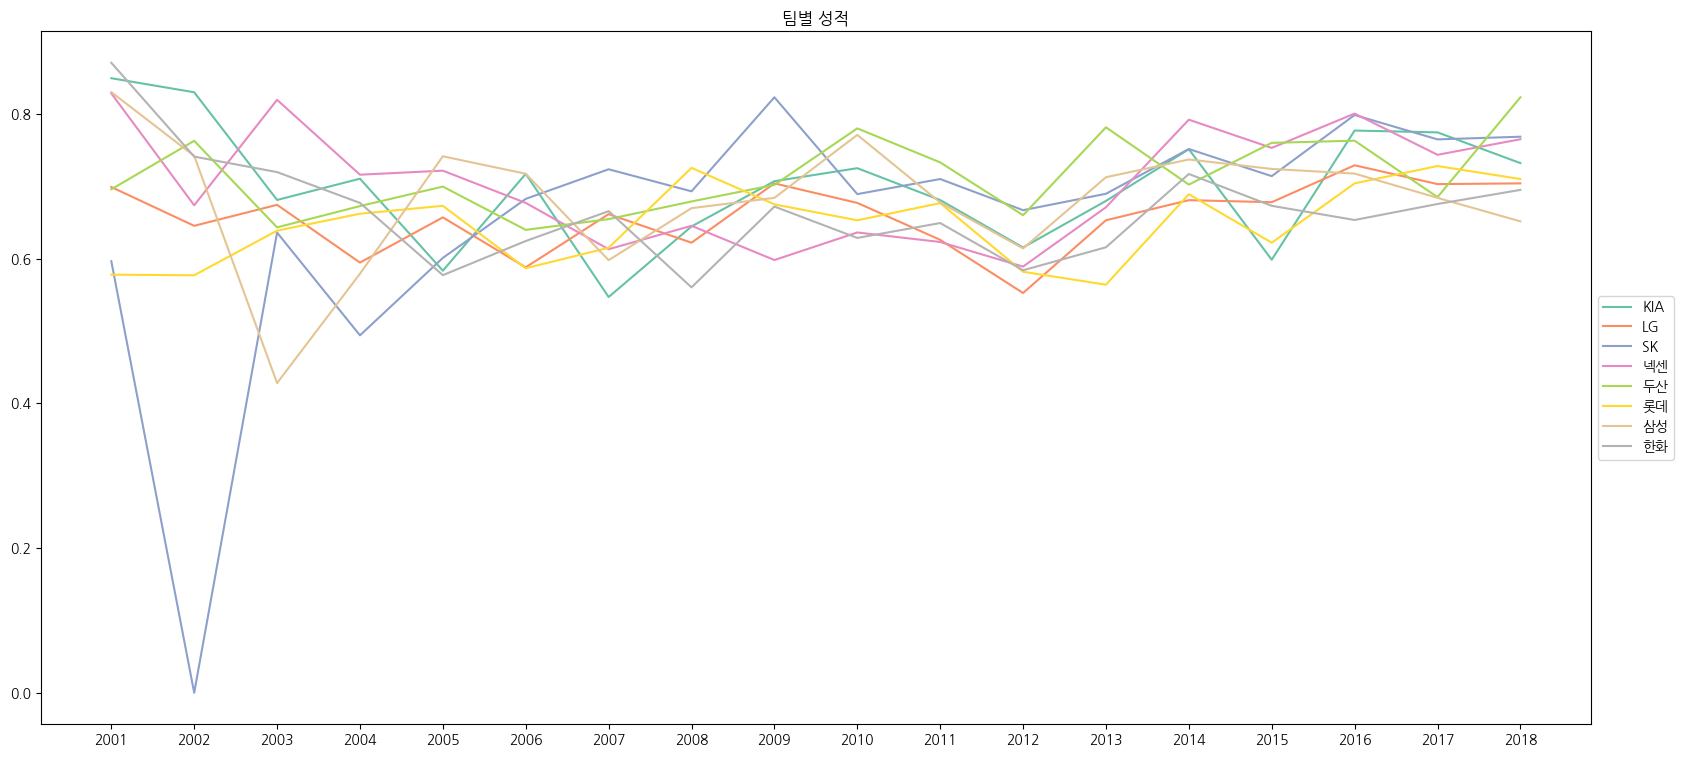

In [8]:
'''
비교적 최근에 창단되어 데이터가 없는 팀(NC, KT)은 데이터가 적기 때문에 제외한다.
또한 데이터가 없는 팀(쌍방울)도 제외한다.
그리고 모든 팀이  데이터가 있는 01년부터 OPS 값을 살펴보려고 한다.
'''

# 01년 이후 NaN 값이 있는 팀은 제외
team_list = regular_season_pivot.loc[:, 2001:].isna().sum(axis=1) <= 0

plt.figure(figsize=(20,9))
plt.plot(regular_season_pivot.loc[team_list, 2001:].T)
plt.legend(regular_season_pivot.loc[team_list, 2001:].T.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(regular_season_pivot.loc[team_list, 2001:].columns)
plt.title('팀별 성적')
plt.show()

'''
하지만 위에서 봤듯이 OPS가 그나마 중앙에 모여있는 2005년 이전(사실 대부분)의 데이터의 수가 매우 적다.
''';
